# **SHOPPER'S INTENTION CLASSIFICATION USING NAIVES BAYES CLASSIFIER**

________________________________________________________________________________________________________________________________________________________________



# 1.**INTRODUCTION**



Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem.

It follows strong (naïve) independence assumptions between the features.

Pros: The advantages of using Naive Bayes are as follows:

Easy and fast to predict class of test data set.

Performs well in case of multi-class prediction.

Performs well in case of categorical features as compared to numerical features.

For numerical variable, normal distribution is assumed (bell curve), which is a strong assumption.

When assumption of independence holds, it performs better as compared to other models.


**Cons:** The disadvantages of using Naive Bayes are as follows:
Zero Frequency Problem: In case, if categorical variable has a category in test data set, which was not observed in training data set, then model will assign a zero probability and will be unable to make a prediction.

Solution: Smoothing techniques such as Laplace estimation.
Bad estimator: Probability outputs from predict_proba are not to be taken too seriously.

Assumption of Independent Predictors: In real life, it is almost impossible to get a set of predictors which are completely independent.

Before diving further let's get to know some important concepts that are realted to Naive Bayes.

________________________________________________________________________________

________________________________________________________________________________

# **PROBLEM STATEMENT**

The data used in this analysis is an Online Shoppers Purchasing Intention.

It was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website.

________________________________________________________________________________
________________________________________________________________________________

> **Scenario (Hypothetical)**:

We imagine ourselves to be a data scientist working for an e-commerce company, and our job is to predict whether an online shopper will make a purchase or not.

The company has provided us with a dataset of online shoppers' behavior, which includes various features such as the type of product, the time spent on the website, the number of pages visited, and the visitor's country, among others.

Our goal is to build a machine learning model that can predict the likelihood of a visitor making a purchase based on their behavior on the website.

Ultimately, our goal is to build a model that can accurately predict whether an online shopper is likely to make a purchase or not. This will help the e-commerce company to target their marketing efforts more effectively, resulting in higher conversion rates and increased revenue.

________________________________________________________________________________
________________________________________________________________________________


# **3. INSTALLING & IMPORTING LIBRARIES**


> 3.1 Installing Libraries

In [ ]:
!pip install -q dataprep
!pip install -q lux-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

**3.2 Importing Libraries**

In [67]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.preprocessing import LabelEncoder, OneHotEncoder       # To Encode the categorical data
from sklearn.compose import ColumnTransformer
# import lux
# import dataprep.eda as eda                                          #for analyis of data at evey step and a full profile report
#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # To handle class imbalance problem
from sklearn.metrics import precision_recall_curve, f1_score        # For precision and recall metric estimation
from sklearn.metrics import classification_report, accuracy_score   # To generate complete report of evaluation metrics
from sklearn.metrics import confusion_matrix                        # To plot confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

**4. Data Acquisition & Description**



---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset includes various features such as the type of product, the time spent on the website, the number of pages visited, and the visitor's country, among others which would help **predict** the online shopper's **intention** to shop.
- Here `Revenue` is our **target** variable

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 12330 | 18 | 1047 Kb|

<br>

| Id | Features | Description |
| :-- | :--| :--|
|01| **Administrative** | This is the number of pages of this type (administrative) the user has visited.
|02| **Administrative_Duration** | This is the amount of time spent in this category of pages.|
|03|**Informational**| This is the number of pages of this type (informational) that the user visited. |
|04|**Informational_Duration**| This is the amount of time spent in this category of pages |
|05|**ProductRelated**| This is the number of pages of this type (product related) that the user visited |
|06|**ProductRelated_Duration**| This is the amount of time spent in this category of pages|
|07| **BounceRates** | he percentage of visitors who enter the website through that page and exit without triggering any additional tasks
|08| **ExitRates** | The percentage of pageviews on the website that end at that specific page|
|09|**PageValues**| The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction |
|10|**SpecialDay**| This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized |
|11|**Month**| Contains the month the pageview occurred, in string form
|12|**OperatingSystems**| An integer value representing the operating system that the user was on when viewing the page|
|13| **Browser** | An integer value representing the browser that the user was using to view the page
|14| **Region** | An integer value representing which region the user is located in|
|15|**TrafficType**| An integer value representing what type of traffic the user is categorized into |
|16|**VisitorType**| A string representing whether a visitor is New Visitor, Returning Visitor, or Other|
|17|**Weekend**| A boolean representing whether the session is on a weekend
|18|**Revenue**| A boolean representing whether or not the user completed the purchase


In [ ]:
df = pd.read_csv('https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%205%20ML2/online_shoppers_intention.csv')


In [68]:
print('Data Shape:', df.shape)
df.head()

Data Shape: (12205, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00000,0,0.00000,1,0.00000,0.20000,0.20000,0.00000,0.00000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00000,0,0.00000,2,64.00000,0.00000,0.10000,0.00000,0.00000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00000,0,0.00000,1,0.00000,0.20000,0.20000,0.00000,0.00000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00000,0,0.00000,2,2.66667,0.05000,0.14000,0.00000,0.00000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00000,0,0.00000,10,627.50000,0.02000,0.05000,0.00000,0.00000,Feb,3,3,1,4,Returning_Visitor,True,False


In [69]:
df.shape

(12205, 18)

**4.1 Data Description**

Here we do get information about the data and see some observations from the data which we have

In [70]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000,12205.00000
mean,2.33888,81.64633,0.50873,34.82545,32.04564,1206.98246,0.02037,0.04147,5.94957,0.06194,2.12421,2.35780,3.15330,4.07390
std,3.33044,177.49185,1.27562,141.42481,44.59365,1919.60140,0.04526,0.04616,18.65367,0.19967,0.90682,1.71011,2.40234,4.01665
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000
25%,0.00000,0.00000,0.00000,0.00000,8.00000,193.00000,0.00000,0.01423,0.00000,0.00000,2.00000,2.00000,1.00000,2.00000
50%,1.00000,9.00000,0.00000,0.00000,18.00000,608.94286,0.00290,0.02500,0.00000,0.00000,2.00000,2.00000,3.00000,2.00000
75%,4.00000,94.70000,0.00000,0.00000,38.00000,1477.15476,0.01667,0.04853,0.00000,0.00000,3.00000,2.00000,4.00000,4.00000
max,27.00000,3398.75000,24.00000,2549.37500,705.00000,63973.52223,0.20000,0.20000,361.76374,1.00000,8.00000,13.00000,9.00000,20.00000


**Observation:**

- Here we observe that **most** time is spent on the **Product** page.

- **Special** Days have **more** traffic.

**4.2 Data Information**

In this section we see the information about the types of features.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

________________________________________________________________________________________________________________________________________________________________
**Observation:**

- Here we find that there are **12230** entries and **18** columns in the data set
- There are **2** bool, **7** float, **7** int and **2** object datatypes
- **Revenue** is the **target** variable which is found to be **categorical** in nature

________________________________________________________________________________
________________________________________________________________________________

**4.3 Data Pre profiling**






- For quick analysis we are using the *dataprep* library.

- It generates a quick report for statistics and insight of the dataset of the data and the distribution of it.


**Observation:**

There are 11 numerical and 7 categorical data columns in the dfata set.

There is no missing data in the data set.

There is 1% of duplicated data.

Most of the columns are skewed

________________________________________________________________________________________________________________________________________________________________

# **5. Data Pre-Processing**
________________________________________________________________________________________________________________________________________________________________

**5.1 Dealing Data Duplicates if any**

*  As only 1% of the data is duplicated we will drop it List item




In [72]:
before_shape = df.shape
print('Data Shape [Before]:', before_shape)

df.drop_duplicates(inplace = True)

after_shape = df.shape
print('Data Shape [After]:', after_shape)

Data Shape [Before]: (12205, 18)
Data Shape [After]: (12205, 18)


In [73]:
df.shape

(12205, 18)

**Observation:**

All the duplicated data was dropped

# **6. Exploratory Data Analysis**

**<h4>Question: How are the different pages distributed?**

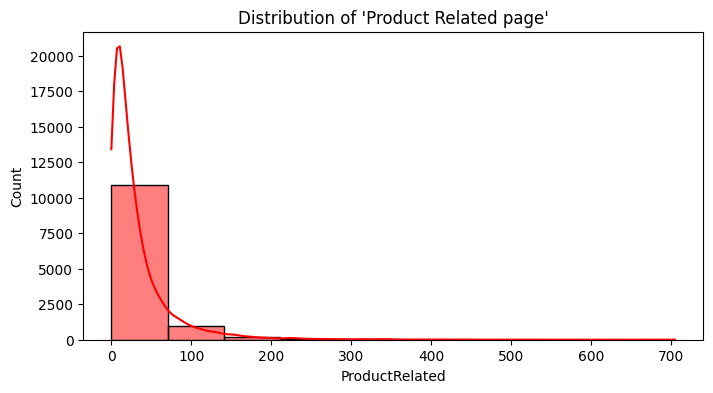

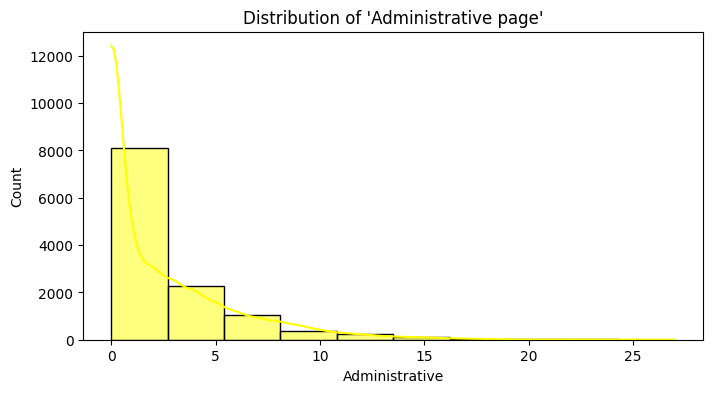

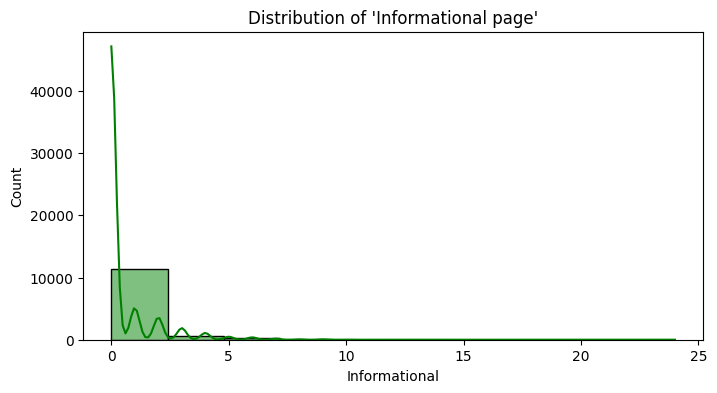

In [74]:
plt.figure(figsize=(8,4))
sns.histplot(x = df["ProductRelated"],
             bins = 10,
             kde = True,
             color = "red").set(title = "Distribution of 'Product Related page'");

plt.figure(figsize=(8,4))
sns.histplot(x = df["Administrative"],
             bins = 10,
             kde = True,
             color = "yellow").set(title = "Distribution of 'Administrative page'");

plt.figure(figsize=(8,4))
sns.histplot(x = df["Informational"],
             bins = 10,
             kde = True,
             color = "green").set(title = "Distribution of 'Informational page'");

**Observations**

In all the above plots we find that the data for all the 3 pages is skewed on right.


**Question: How does the Weekend affect the revenue?**

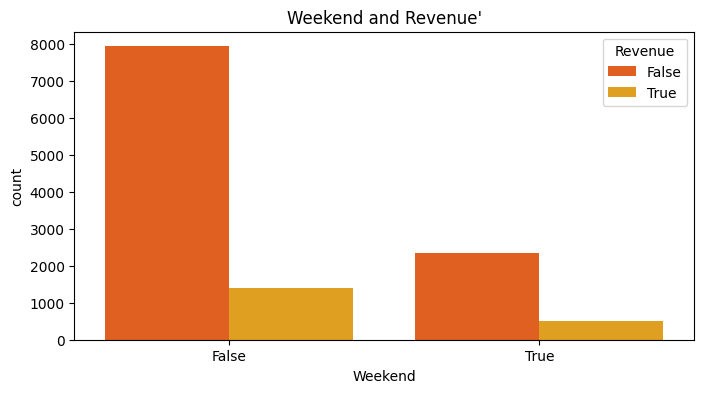

In [75]:
plt.figure(figsize=(8,4))
sns.countplot(x = df["Weekend"],
             hue= df['Revenue' ],
             palette='autumn').set(title = "Weekend and Revenue'");

**Observation**

Data is highly imbalanced but it seems like the purchase on the weekends is less than that on normal days.

**Question: Which is the Operating Systems affecting the revenue the most?**

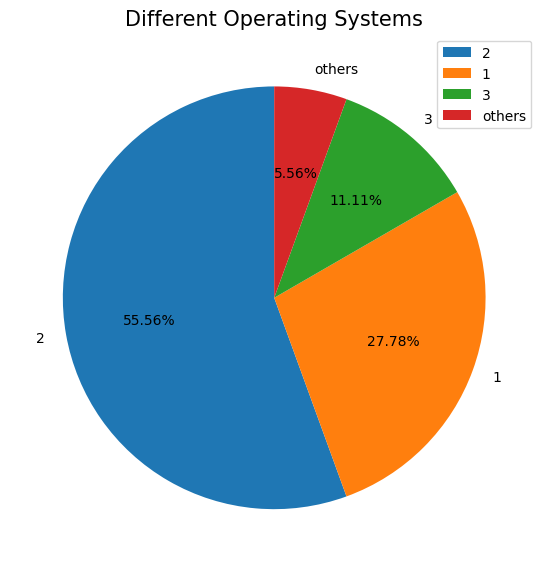

In [76]:
# # plotting a pie chart for Operating Systems

plt.figure(figsize=(15, 8))
size = [5000, 2500, 1000, 500]
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, labels = labels, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

**Observation**

The Top 3 Operating Systems are covered 95% of this dataset. So we should focus on them to increase our business.

**Question: What is the visitor type on the website?**

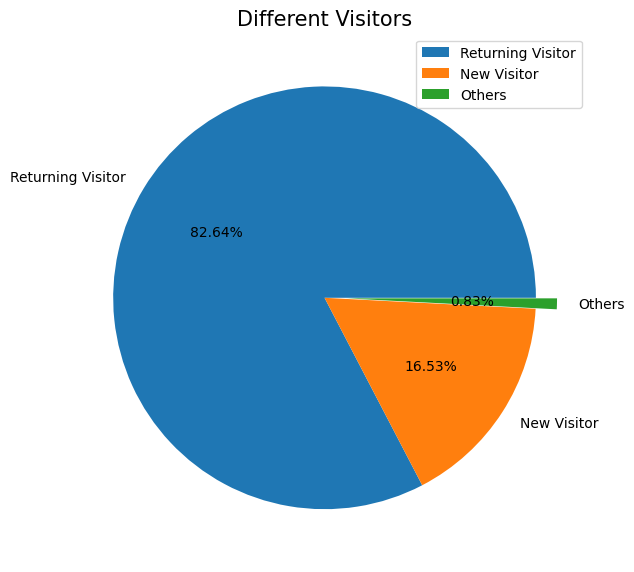

In [77]:
plt.figure(figsize=(15,7))
size = [10000, 2000, 100]
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, labels = labels, explode = explode, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

**Observation**

The most **potential** customers are the returning visitors


**Question: Relationshios of features with respect to each other?**

In [ ]:
#plotting a pairplot with only numerical data
data= df.drop(['Month', 'VisitorType', 'Weekend'], axis=1)

sns.pairplot(data, hue='Revenue')

Output hidden; open in https://colab.research.google.com to view.

**Question:  Correlation Matrix of data with each other**

<Axes: >

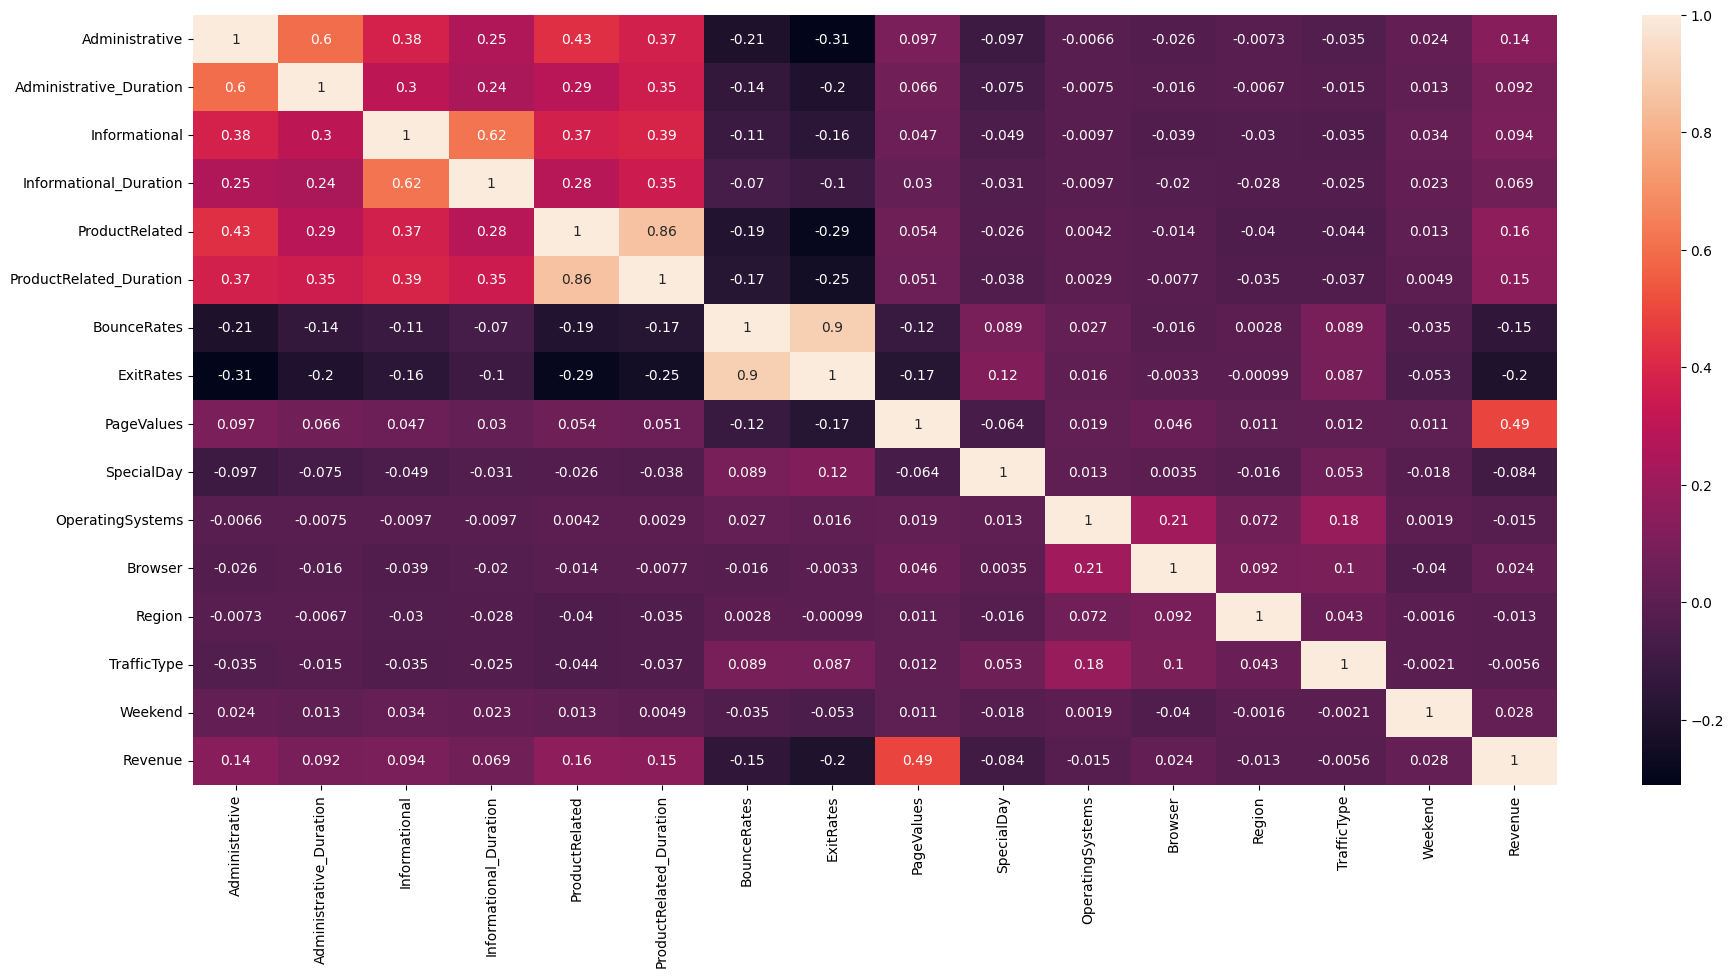

In [78]:
#plotting a heatmap of the correlation
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot=True)

**Observation**

We  find here that some of teh features are highly correlated therefore we will drop one of them to reduce reundancy and improve accuracy.

The basic assumption of Naive Bayes classifier is to assume features are independent of each other within each class, it's not necesarily needed.

# **7.Data Preparation**

**7.1 Splitting the data into train test split**

In [117]:
# X = df.drop('Revenue', axis=1)
# y = df['Revenue']

X_train, X_split, y_train, y_split= train_test_split(df.drop('Revenue', axis=1), df['Revenue'], test_size=0.2, random_state=42)

In [118]:
X_train, X_test, y_train, y_test= train_test_split(df.drop('Revenue', axis=1), df['Revenue'], test_size=0.2, random_state=42)

print('Shape of features: ', X_train.shape, X_test.shape)
print('Shape of target: ', y_train.shape, y_test.shape)


Shape of features:  (9764, 17) (2441, 17)
Shape of target:  (9764,) (2441,)


In [119]:
Label= LabelEncoder()

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#encoding the target column
label= LabelEncoder()

y_train= label.fit_transform(y_train)
y_test= label.transform(y_test)

print(y_train)

[0 1 0 ... 1 0 0]


In [121]:
print(y_train)

[0 1 0 ... 1 0 0]


**7.2 Encoding the Non Numerical Columns of the data set given**

In [122]:
trans= ColumnTransformer([
    ('trf1', OneHotEncoder(sparse_output=False, drop='first'),
    ['Month','VisitorType',	'Weekend'])], remainder='passthrough')

#encoding
X_train= trans.fit_transform(X_train)
X_test= trans.transform(X_test)

In [123]:
#encoding the target column
label= LabelEncoder()

y_train= label.fit_transform(y_train)
y_test= label.transform(y_test)

<a name = Section72></a>
**7.3 Scaling the data**

- As most of the data is **skewed**, we will scale the data now

In [124]:
scale= StandardScaler()
X_train= scale.fit_transform(X_train)
X_test= scale.transform(X_test)


In [125]:
print('Feature shape:', X_train.shape, X_test.shape)
print('Target shape:', y_train.shape, y_test.shape)

Feature shape: (9764, 26) (2441, 26)
Target shape: (9764,) (2441,)


________________________________________________________________________________________________________________________________________________________________
# **8. MODEL DEVELOPMENT AND EVALUATION**
________________________________________________________________________________

Here we will develop Gaussian Naive Bayes using important features and tune our model and then analyze the results obtained and make our observations


**8.1 Naives Bayes Model**

In [126]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

**8.2 Evaluating the Model**

In [127]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
y_test_pred_count = naive.predict(X_test)


print('Testing accuracy: ', accuracy_score(y_test, y_test_pred_count))
print('Testing f1_score: ', f1_score(y_test, y_test_pred_count))

Testing accuracy:  0.7120032773453503
Testing f1_score:  0.46212700841622034


In [128]:
print('Testing accuracy: ', accuracy_score(y_test, y_test_pred_count))

Testing accuracy:  0.7120032773453503


In [129]:
print('Testing f1_score: ', f1_score(y_test, y_test_pred_count))

Testing f1_score:  0.46212700841622034


In [136]:
confusion_matrix(y_test_pred_count, y_test)

array([[1436,   60],
       [ 643,  302]])

In [137]:
confusion_matrix (y_train_pred_count, y_train)

NameError: ignored

NameError: ignored

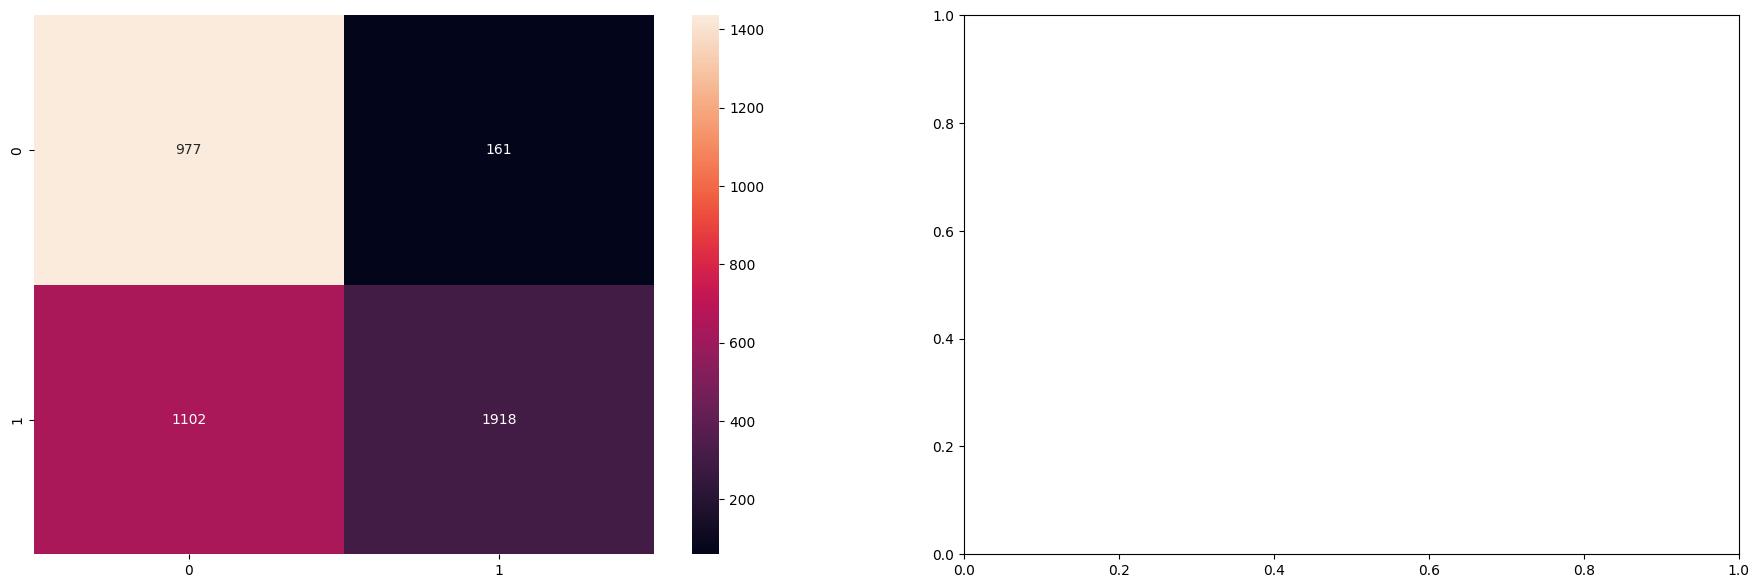

In [132]:
label1=[[977, 161],[1102,1918]]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(22, 7))
sns.heatmap(confusion_matrix(y_test_pred_count, y_test), ax= ax1, annot=label1, fmt='')
sns.heatmap(confusion_matrix(y_train_pred_count, y_train), ax=ax2, annot=label2, fmt='')
ax1.set_title(label = 'Test Data', size = 14)
ax2.set_title(label = 'Train Data', size = 14)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [133]:
def ClassificationReport():
  logistic_report_train = classification_report(y_train, y_train_pred_count)
  logistic_report_test = classification_report(y_test, y_test_pred_count)
  print('                    Training Report          ')
  print(logistic_report_train)
  print('                    Testing Report           ')
  print(logistic_report_test)

In [134]:
ClassificationReport()

NameError: ignored